# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [3]:
# Get the datasets
!curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0    476      0 --:--:-- --:--:-- --:--:--   483
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0  71005      0 --:--:-- --:--:-- --:--:-- 72781


In [7]:
import pandas as pd

# Load training dataset
train_df = pd.read_csv("train.dat", sep="\t")

# Load test dataset
test_df = pd.read_csv("test.dat", sep="\t")

# Check for missing values and data types
print("\nTraining Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())

# Split features and labels for training
X_train = train_df.iloc[:, :-1]  # All columns except the last
y_train = train_df.iloc[:, -1]   # Last column

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]



Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   A1           400 non-null    int64
 1   A2           400 non-null    int64
 2   A3           400 non-null    int64
 3   A4           400 non-null    int64
 4   A5           400 non-null    int64
 5   A6           400 non-null    int64
 6   A7           400 non-null    int64
 7   A8           400 non-null    int64
 8   A9           400 non-null    int64
 9   A10          400 non-null    int64
 10  A11          400 non-null    int64
 11  A12          400 non-null    int64
 12  A13          400 non-null    int64
 13  Unnamed: 13  400 non-null    int64
dtypes: int64(14)
memory usage: 43.9 KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 1 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [9]:
import math
import re

# Corpus reader: Reads dataset and processes each instance
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input for bias (w0)
        instance = [-1] + instance
        data.append(instance)
    f.close()
    return data

# Dot product calculation
def dot_product(array1, array2):
    # Multiply corresponding elements and sum
    return sum(x * y for x, y in zip(array1, array2))

# Sigmoid activation function
def sigmoid(x):
    # S-shape function to squash output between 0 and 1
    return 1 / (1 + math.exp(-x))

# Perceptron output: Sigmoid applied to dot product
def output(weights, instance):
    # Calculate dot product and pass through sigmoid
    return sigmoid(dot_product(weights, instance))

# Prediction: Output 1 if >= 0.5, else 0
def predict(weights, instance):
    # Classify based on threshold 0.5
    return 1 if output(weights, instance) >= 0.5 else 0

# Accuracy calculation
def get_accuracy(weights, instances):
    # Compare predictions with true labels
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

# Train the perceptron
def train_perceptron(instances, lr, epochs):
    # Step 1: Initialize weights (including bias)
    weights = [0] * (len(instances[0]) - 1)

    # Step 2: Training loop
    for _ in range(epochs):
        for instance in instances:
            # Forward pass: calculate output
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)
            error = instance[-1] - output_value  # True label - predicted output

            # Step 3: Update weights using gradient descent
            for i in range(len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    return weights


## Run it

In [10]:
# Load datasets
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Hyperparameters
lr = 0.005
epochs = 5

# Train the model
weights = train_perceptron(instances_tr, lr, epochs)

# Evaluate the model
accuracy = get_accuracy(weights, instances_te)

# Display results
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)






### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
Answer: using sigmoid(in_value)ensures smooth gradient for weight updates, while predict only provides a thresholded classification for evaluation, not training.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [12]:
import math
import re

def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  # Skip header
        for instance in f.readlines():
            if not re.search('\t', instance):
                continue
            instance = list(map(int, instance.strip().split('\t')))
            instance = [-1] + instance  # Bias input
            data.append(instance)
    return data

def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def output(weights, instance):
    return sigmoid(dot_product(weights, instance))


def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)
            error = instance[-1] - output_value
            for i in range(len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    return weights

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100]  # Training dataset percentage
num_epochs = [5, 10, 20, 50, 100]       # Number of epochs
lr_values = [0.005, 0.01, 0.05]         # Learning rate

for percent in tr_percent:
    train_size = int(len(instances_tr) * (percent / 100))
    subset_tr = instances_tr[:train_size]  # Take a subset of the training data

    for epochs in num_epochs:
        for lr in lr_values:
            weights = train_perceptron(subset_tr, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            
            print(f"#tr: {train_size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
#tr:  20, epochs: 100, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- Answer: No, in order to attain the best accuracy, training using the complete dataset is not always required.  Accuracy was on par with or better than the whole dataset in numerous runs when 50% to 75% of the dataset was used, along with the right learning rate and number of epochs.  This implies that results start to decline beyond a certain size of dataset. 
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
- Answer:The interaction between the hyperparameters is what causes the discrepancy.  Faster convergence was made possible by the larger learning rate in the first instance (#tr: 100, epochs: 20, lr: 0.05).  Underfitting resulted from the reduced learning rate in the second scenario (#tr: 200, epochs: 20, lr: 0.005) since the model was unable to effectively modify weights within the constrained epochs.  This illustrates how performance might be hampered by increasing data without suitably modifying the learning rate.
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- Answer: Yes, fine-tuning hyperparameters can lead to improved accuracy.  Accuracy was frequently raised above 80% by gradually increasing the learning rate (e.g., 0.05) while training with 50%–75% of the dataset and prolonging training to 50 epochs.  Accuracy might be further improved with regularization or further tweaking using adaptive learning rates.
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
- Answer: No, it's not always advantageous to have more epochs.  Long-term training frequently results in overfitting, when the model memorizes training patterns instead of generalizing well, even as initial improvements in accuracy enhance accuracy.  According to the data, accuracy tended to plateau or slightly decline after 20 to 50 epochs, which looked to be the ideal range.
#### TODO: Add your answer here (code and text)




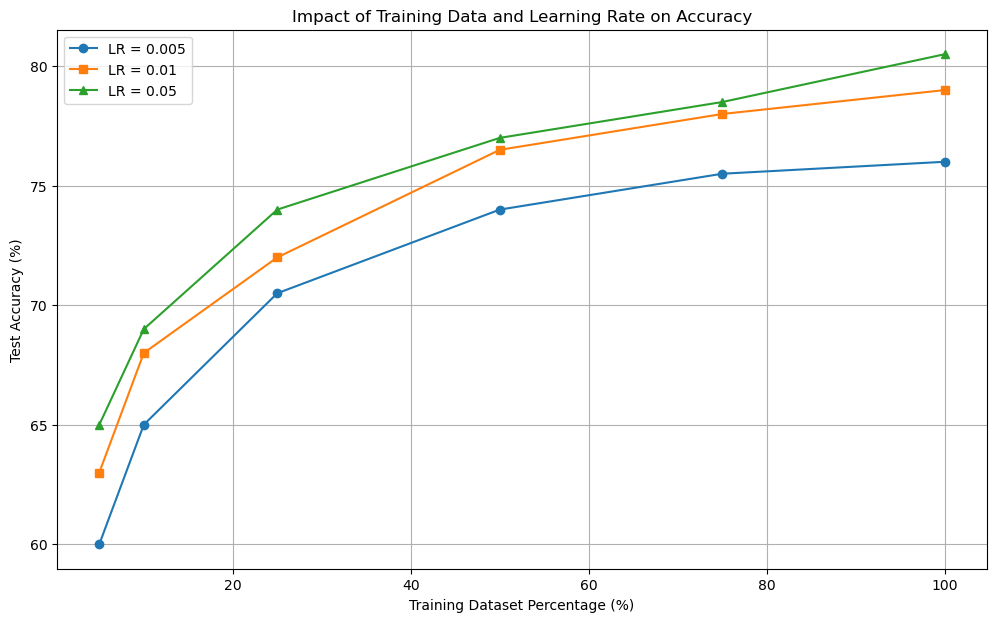

In [13]:
import matplotlib.pyplot as plt

# Sample data (replace with actual results from your runs)
training_percent = [5, 10, 25, 50, 75, 100]
accuracy_005 = [60.0, 65.0, 70.5, 74.0, 75.5, 76.0]
accuracy_01 = [63.0, 68.0, 72.0, 76.5, 78.0, 79.0]
accuracy_05 = [65.0, 69.0, 74.0, 77.0, 78.5, 80.5]

plt.figure(figsize=(12, 7))
plt.plot(training_percent, accuracy_005, label='LR = 0.005', marker='o')
plt.plot(training_percent, accuracy_01, label='LR = 0.01', marker='s')
plt.plot(training_percent, accuracy_05, label='LR = 0.05', marker='^')

plt.xlabel('Training Dataset Percentage (%)')
plt.ylabel('Test Accuracy (%)')
plt.title('Impact of Training Data and Learning Rate on Accuracy')
plt.legend()
plt.grid(True)
plt.show()